In [33]:
import glyco as gl
import glob
import pandas as pd

In [ ]:
# Read glucose data for Gal, Adam, Johan, Ismail
gl.read_multi()
# Plot all in the same curve


In [26]:
folder_path = 'data/fast/' 
glob.glob('{}*.csv'.format(folder_path))

['data/fast/glucose_gal.csv',
 'data/fast/glucose_joh.csv',
 'data/fast/glucose_ism.csv',
 'data/fast/glucose_adm.csv']

# Load all files as one DF

In [62]:
folder_path = 'data/fast/'
D=gl.Devices.ABBOTT 

dfs = []
for file_path in glob.glob('{}*.csv'.format(folder_path)):
    with open(file_path) as f:
        patient_name = f.readline().split(',')[-1].strip()
    df = gl.read_from_csv(file_path, device=D)
    df['patient'] = patient_name
    df = df.set_index(['patient', 't'])
    dfs.append(df)
df = pd.concat(dfs)


# Limit period

In [49]:
start = '2020-11-10'
end = '2020-11-25' 


In [74]:
patients = df.index.get_level_values(0).unique()

# Plot curves compare

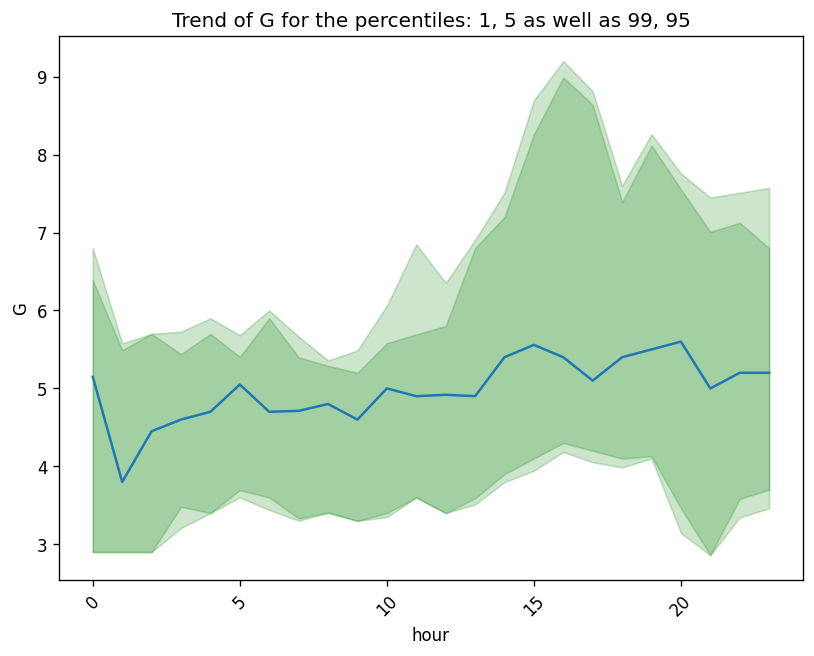

In [14]:
gl.plot_day_trend(df, glbl=gl.G_LBL)